# Setup


In [1]:
!pip install wget
!pip install pyngrok

#This is for setting up Tensorboard

  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9655 sha256=ea6f59839705080ed88e89a64b22a8ed2872c3155e3853ec09407c514713001a
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 718.7/718.7 kB 12.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyngrok: filename=pyngrok-7.0.0-py3-none-any.whl size=21129 sha256=fe6d5b243f10f2b5f0a059271840358d4eebf72b6bad643431582284e67af845
  Stored in directory: /root/.cache/pip/wheels/60/29/7b/f64332aa7e5e88fbd56d4002185ae22dcdc83b35b3d1c2cbf5
Successfully built pyngrok


Tensorboard account connection:

In [2]:
!ngrok config add-authtoken 2WGZ2dMQB9G9ZYbyOTwtvvQhzTs_2Y6nVHjcEVgu1PUXVxYRL

Authtoken saved to configuration file: /root/.ngrok2/ngrok.yml


In [3]:
%load_ext tensorboard

Here is the tensorboard for Q1, Q2:

In [4]:
%tensorboard --logdir /content/runs --host localhost --port 6666
from pyngrok import ngrok

public_url_q1_q2 = ngrok.connect(6666)
print('TB Link:', public_url_q1_q2)

<IPython.core.display.Javascript object>

TB Link: NgrokTunnel: "https://593b-34-124-190-54.ngrok-free.app" -> "http://localhost:6666"


See below for Q3 tensorboard:

In [5]:
%tensorboard --logdir /content/detection_logs --host localhost --port 6767
public_url_q3 = ngrok.connect(6767)
print('TB Link for detection_logs:', public_url_q3)

<IPython.core.display.Javascript object>

TB Link for detection_logs: NgrokTunnel: "https://f015-34-124-190-54.ngrok-free.app" -> "http://localhost:6767"


In [6]:
!git clone https://github.com/JamesEmi/VLRhw1.git

Cloning into 'VLRhw1'...
remote: Enumerating objects: 252, done.
remote: Counting objects: 100% (252/252), done.
remote: Compressing objects: 100% (150/150), done.
remote: Total 252 (delta 152), reused 174 (delta 102), pack-reused 0
Receiving objects: 100% (252/252), 532.76 KiB | 17.19 MiB/s, done.
Resolving deltas: 100% (152/152), done.


In [7]:
!bash /content/VLRhw1/q1_q2_classification/download_data.sh

> Downloading datasets to data
--2023-10-05 15:07:03--  http://host.robots.ox.ac.uk/pascal/VOC/voc2007/VOCtrainval_06-Nov-2007.tar
Resolving host.robots.ox.ac.uk (host.robots.ox.ac.uk)... 129.67.94.152
Connecting to host.robots.ox.ac.uk (host.robots.ox.ac.uk)|129.67.94.152|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 460032000 (439M) [application/x-tar]
Saving to: ‘VOCtrainval_06-Nov-2007.tar’

VOCtrainval_06-Nov- 100%[===================>] 438.72M  14.5MB/s    in 27s     

2023-10-05 15:07:30 (16.4 MB/s) - ‘VOCtrainval_06-Nov-2007.tar’ saved [460032000/460032000]

--2023-10-05 15:07:31--  http://host.robots.ox.ac.uk/pascal/VOC/voc2007/VOCtest_06-Nov-2007.tar
Resolving host.robots.ox.ac.uk (host.robots.ox.ac.uk)... 129.67.94.152
Connecting to host.robots.ox.ac.uk (host.robots.ox.ac.uk)|129.67.94.152|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 451020800 (430M) [application/x-tar]
Saving to: ‘VOCtest_06-Nov-2007.tar’

VOCtest_06-No

In [8]:
from google.colab import files

In [9]:
# To save all runs to Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [21]:
!cd /content/runs
!zip -r runs.zip runs/
files.download('runs.zip')
#run this before restarting runtime or when done with a work slot.

  adding: runs/ (stored 0%)
  adding: runs/og_aug1/ (stored 0%)
  adding: runs/og_aug1/events.out.tfevents.1696483762.29d536f34dd2.15212.0 (deflated 94%)
  adding: runs/AAaug_1/ (stored 0%)
  adding: runs/AAaug_1/events.out.tfevents.1696483367.29d536f34dd2.11755.0 (deflated 93%)
  adding: runs/AAnoaug_1/ (stored 0%)
  adding: runs/AAnoaug_1/events.out.tfevents.1696483558.29d536f34dd2.13467.0 (deflated 94%)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Question 1

Running first for OG param values: `    args = ARGS(
        epochs = 10,
        inp_size = 64,
        use_cuda = True,
        val_every = 70,
        lr = 0.001,         #try annealing too.
        batch_size = 32,
        step_size = 10,
        gamma = 0.1
    )
`

In [12]:
!python3 /content/VLRhw1/q1_q2_classification/train_q1.py

2023-10-05 05:29:19.010564: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-05 05:29:20.015643: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
args.batch_size = 32
args.device = cuda
args.epochs = 10
args.gamma = 0.88
args.inp_size = 64
args.log_every = 100
args.lr = 0.001
args.save_at_end = False
args.save_freq = -1
args.step_size = 10
args.test_batch_size = 1000
args.use_augmentations = True
args.val_every = 70

Using Data Augmentations: True
Epoch 0:   0% 0/157 [00:00<?, ?it/s]Train Epoch: 0 [0 (0%)]	Loss: 0.681025
map:  0.08109043989930427
Epoch 0:  45% 70/157 [00:11<00:03, 27.14it/s]map:  0.11561099973615979
Epoch 0:  62% 97/157 [00:19<00:07,  8.35it/s]Train Epoch: 0 [100 (64%)]	Loss: 

Now, optimize hyperparams to get mAP to 22.

Hyper params:
`    args = ARGS(
        epochs = 5,
        inp_size = 64,
        use_cuda = True,
        val_every = 70,
        lr = 0.0015,   
        batch_size = 32,
        step_size = 1,
        gamma = 0.88,
        use_augmentations=True
    )`

In [10]:
#Remember to update writer in trainer.py, for logging
!python3 /content/VLRhw1/q1_q2_classification/train_q1.py
#with data aug

2023-10-05 05:22:43.134858: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-05 05:22:44.161614: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
args.batch_size = 32
args.device = cuda
args.epochs = 5
args.gamma = 0.88
args.inp_size = 64
args.log_every = 100
args.lr = 0.0015
args.save_at_end = False
args.save_freq = -1
args.step_size = 1
args.test_batch_size = 1000
args.use_augmentations = True
args.val_every = 70

Using Data Augmentations: True
Epoch 0:   0% 0/157 [00:00<?, ?it/s]Train Epoch: 0 [0 (0%)]	Loss: 0.681025
map:  0.08150882810870402
Epoch 0:  45% 70/157 [00:12<00:03, 28.19it/s]map:  0.11795704855861415
Epoch 0:  64% 100/157 [00:20<00:05, 10.53it/s]Train Epoch: 0 [100 (64%)]	Loss: 

In [11]:
#Remember to update writer in trainer.py, for logging
!python3 /content/VLRhw1/q1_q2_classification/train_q1.py
#without data aug

2023-10-05 05:25:55.687569: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-05 05:25:56.726182: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
args.batch_size = 32
args.device = cuda
args.epochs = 5
args.gamma = 0.88
args.inp_size = 64
args.log_every = 100
args.lr = 0.0015
args.save_at_end = False
args.save_freq = -1
args.step_size = 1
args.test_batch_size = 1000
args.use_augmentations = False
args.val_every = 70

Using Data Augmentations: False
Epoch 0:   0% 0/157 [00:00<?, ?it/s]Train Epoch: 0 [0 (0%)]	Loss: 0.681171
map:  0.0817350289001782
Epoch 0:  45% 70/157 [00:10<00:02, 32.07it/s]map:  0.11891366715356552
Epoch 0:  62% 98/157 [00:19<00:06,  8.74it/s]Train Epoch: 0 [100 (64%)]	Loss: 

In [18]:
#To get necessary plots as images
import matplotlib.pyplot as plt
from tensorboard.backend.event_processing.event_accumulator import EventAccumulator

def plot_tensorboard_log(log_path, tag, xlabel, ylabel, title):

    # Load TensorBoard logs.
    event_acc = EventAccumulator('/content/runs/og_aug1')
    event_acc.Reload()

    # Get data
    data = {}

    for scalar_event in event_acc.Scalars(tag):
        step = scalar_event.step
        value = scalar_event.value
        data[step] = value

    # Create a figure
    fig, ax = plt.subplots(figsize=(10, 6))

    # Plot data
    ax.plot(list(data.keys()), list(data.values()), label=tag)

    # Add labels and title
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_title(title)
    ax.legend()

    # Save plot as a file
    plt.savefig(f"{title.replace(' ', '_')}.png")

    # Display the plot
    plt.show()


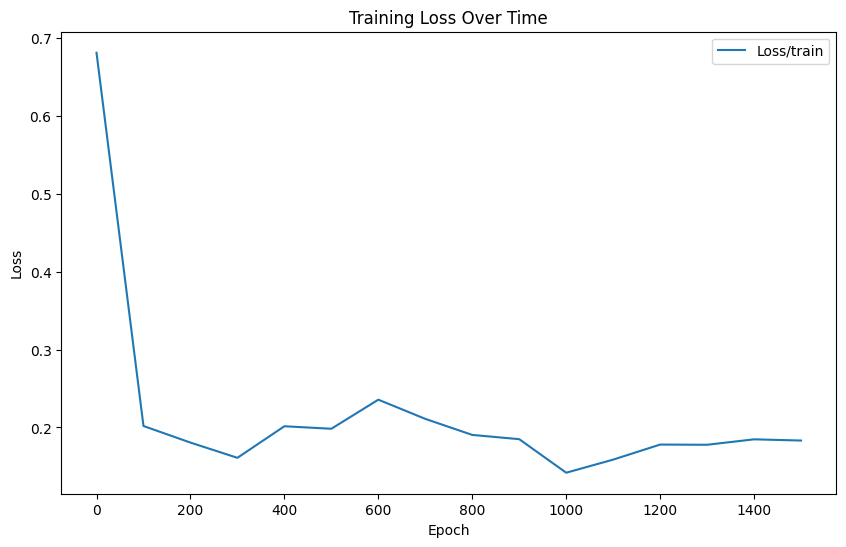

In [20]:
plot_tensorboard_log('/content/runs/og_aug1', 'Loss/train', 'Epoch', 'Loss', 'Training Loss Over Time')

# Question 2

Try running for the below hyperparam set:
`  args = ARGS(
        epochs=50,
        inp_size=64,
        use_cuda=True,
        val_every=70,
        lr=0.001,
        batch_size=32,
        step_size=10,
        gamma=0.85
    )`

In [ ]:
!python3 /content/VLRhw1/q1_q2_classification/train_q2.py

2023-10-05 06:01:22.780815: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
args.batch_size = 32
args.device = cuda
args.epochs = 50
args.gamma = 0.85
args.inp_size = 64
args.log_every = 100
args.lr = 0.001
args.save_at_end = False
args.save_freq = -1
args.step_size = 10
args.test_batch_size = 1000
args.use_augmentations = True
args.val_every = 70

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.

Getting a `mAP` of around `0.42` in around 33 epochs.

Now running for the below optimized hyperparam set:
`  args = ARGS(
        epochs=50,
        inp_size=224,
        use_cuda=True,
        val_every=70,
        lr=0.00015,  
        batch_size=32, # or 64
        step_size=6
        gamma=0.1  
    )`
This is to test AA params. If it runs well change a lil bit and use for results.

In [10]:
!python3 /content/VLRhw1/q1_q2_classification/train_q2.py

2023-10-05 15:15:12.752362: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-10-05 15:15:12.805951: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-05 15:15:13.726162: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
args.batch_size = 32
args.device = cuda
args.epochs = 50
args.gamma = 0.1
args.inp_size = 224
args.log_every = 100
args.lr = 0.00015
args.save_at_end = False
args.save_freq = -1
args.step_size = 6
args.test_batch_size = 1000
args.use_augmentations = 

mAP of 0.69; need to optimize further. Try `args = ARGS(
        epochs=50,
        inp_size=224,
        use_cuda=True,
        val_every=70,
        lr=0.00005,  
        batch_size=32, # or 64
        step_size=6
        gamma=0.1  
    )`
Loss and mAP seem to be oscillating, so just try reducing LR by 3 fold. If this doesn't work will revert to original param set and play with the gamma value.

In [ ]:
!python3 /content/VLRhw1/q1_q2_classification/train_q2.py

Write the `TSNE.py` file:

In [ ]:
!python /content/VLRhw1/q1_q2_classification/TSNE.py

2023-10-04 01:28:00.774325: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-04 01:28:01.801397: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights

In [ ]:
# #try for 5 epochs, with different hyper params - args = ARGS(
#         epochs=5,
#         inp_size=64,
#         use_cuda=True,
#         val_every=70,
#         lr=0.0003,
#         batch_size=64,
#         step_size=10,
#         gamma=0.85
#     )
!python3 /content/VLRhw1/q1_q2_classification/train_q2.py

2023-10-04 01:35:39.773858: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-04 01:35:40.760447: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
args.batch_size = 64
args.device = cuda
args.epochs = 5
args.gamma = 0.88
args.inp_size = 64
args.log_every = 100
args.lr = 0.0003
args.save_at_end = False
args.save_freq = -1
args.step_size = 10
args.test_batch_size = 1000
args.val_every = 70

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Argu

In [ ]:
!python /content/VLRhw1/q1_q2_classification/TSNE.py

2023-10-04 01:40:01.142615: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-04 01:40:02.202320: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights

# Question 3

In [ ]:
!cd /content/VLRhw1/detection
!rm -rf mAP
!git clone https://github.com/JamesEmi/mAP
!rm -rf mAP/input/*

Cloning into 'mAP'...
remote: Enumerating objects: 820, done.
remote: Counting objects: 100% (145/145), done.
remote: Compressing objects: 100% (27/27), done.
remote: Total 820 (delta 130), reused 118 (delta 118), pack-reused 675
Receiving objects: 100% (820/820), 5.18 MiB | 25.37 MiB/s, done.
Resolving deltas: 100% (308/308), done.


In [ ]:
!python3 /content/VLRhw1/detection/train.py --visualize_gt

2023-10-03 21:37:27.036673: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-03 21:37:28.894249: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Please check your GPU (if running on AWS). Using CPU instead.
False
Loading data...
/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 12 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
/usr

In [ ]:
!python3 /content/VLRhw1/detection/test_object_detection.py

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=RegNet_X_400MF_Weights.IMAGENET1K_V1`. You can also use `weights=RegNet_X_400MF_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
../usr/local/lib/python3.10/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3483.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
......
--------------------------------------------

In [ ]:
!python3 /content/VLRhw1/detection/train.py --overfit

2023-10-03 23:53:48.625732: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-03 23:53:49.573255: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Good to go!
False
Loading data...
Loading a small subset for overfitting.
/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 12 worker processes in total. Our suggested max number of worker in current system is 8, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
/usr/local/lib

Looks good, now try to look at `loss.png`:

Move on to inference:

In [ ]:
!python3 /content/VLRhw1/detection/train.py --overfit=False
#This is step 8 of README, run it later. Need loss curved from this.

In [ ]:
!python3 /content/VLRhw1/detection/train.py --inference=False --test_inference=False --overfit

2023-10-04 02:59:53.683516: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-04 02:59:54.694529: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Good to go!
True
Loading data...
Loading a small subset for overfitting.
/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 12 worker processes in total. Our suggested max number of worker in current system is 8, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
/usr/lo

In [ ]:
!pip show torch torchvision

Name: torch
Version: 2.0.1+cu118
Summary: Tensors and Dynamic neural networks in Python with strong GPU acceleration
Home-page: https://pytorch.org/
Author: PyTorch Team
Author-email: packages@pytorch.org
License: BSD-3
Location: /usr/local/lib/python3.10/dist-packages
Requires: filelock, jinja2, networkx, sympy, triton, typing-extensions
Required-by: fastai, torchaudio, torchdata, torchtext, torchvision, triton
---
Name: torchvision
Version: 0.15.2+cu118
Summary: image and video datasets and models for torch deep learning
Home-page: https://github.com/pytorch/vision
Author: PyTorch Core Team
Author-email: soumith@pytorch.org
License: BSD
Location: /usr/local/lib/python3.10/dist-packages
Requires: numpy, pillow, requests, torch
Required-by: fastai


In [ ]:
# prompt: deprecate my torch version to torch==1.12.1+cu113

!pip uninstall torch torchvision
!pip install torch==1.12.1 torchvision==0.13.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 776.3/776.3 MB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.1/19.1 MB 36.7 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchaudio 2.0.2+cu118 requires torch==2.0.1, but you have torch 1.12.1 which is incompatible.
torchdata 0.6.1 requires torch==2.0.1, but you have torch 1.12.1 which is incompatible.
torchtext 0.15.2 requires torch==2.0.1, but you have torch 1.12.1 which is incompatible.


In [ ]:
!cd /content/VLRhw1/detection
!rm -rf mAP
!git clone https://github.com/JamesEmi/mAP
!rm -rf mAP/input/*

Cloning into 'mAP'...
remote: Enumerating objects: 820, done.
remote: Counting objects: 100% (145/145), done.
remote: Compressing objects: 100% (27/27), done.
remote: Total 820 (delta 130), reused 118 (delta 118), pack-reused 675
Receiving objects: 100% (820/820), 5.18 MiB | 16.47 MiB/s, done.
Resolving deltas: 100% (308/308), done.


In [ ]:
!python3 /content/VLRhw1/detection/train.py --inference=False --test_inference=False --overfit

Good to go!
True
Loading data...
Loading a small subset for overfitting.
/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:563: UserWarning: This DataLoader will create 12 worker processes in total. Our suggested max number of worker in current system is 8, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent 

Now, inference runs. Just make sure to update var names. Work on pdf.